<a href="https://colab.research.google.com/github/matheusnalmeida/Analise-de-dados-criminais-Sinesp/blob/main/Trabalho_Pr%C3%A1tico_2_Analisando_dados_criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático 2 - Analisando dados criminais


## Análise dos dados(Teórica)

- Os dados escolhidos para análise, foram extraídos das soluções SinespJC e Sinesp e possuem dados agrupados por mês de cada ano, 
que apresentam a quantidade de vítimas e ocorrências para cada tipo de crime em cada estado. 
<br><br>
- As colunas que temos para a base de dados de ocorrência são:
1. UF: Estado das ocorrências dos crimes registrados.

2. Tipo do crime: Descrição do respectivo tipo do crime associado.

3. Ano: Ano em que foi registrada a respectiva ocorrência.

4. Mês: Mês em que foi registrada a ocorrência.

5. Ocorrência: Quantidade de ocorrências relacionadas com o mês e ano, para a respectiva UF.
<br><br>

- As colunas que temos para a base de dados de vítimas são:
1. UF: Estado das vítimas dos crimes registrados.

2. Tipo do crime: Descrição do respectivo tipo do crime associado.

3. Ano: Ano em que foi registrada as respectivas vítimas.

4. Mês: Mês em que foram registradas as respectivas vítimas.

5. Vítimas: Quantidade de vítimas relacionadas com o mês e ano, para a respectiva UF.



Em relação a classificação dos dados em qualitativos e quantitativos, temos as seguintes classificações para cada base:

#### <center> Ocorrências

| Variável    |   Tipo   |      Escala  | 
|:--------------|:------------------:|:---------------:|
| UF | Qualitativo | Nominal |
| Tipo Crime | Qualitativo | Nominal |
| Ano | Quantitativo | Ordinal |
| Mês | Qualitativo | Ordinal |
| Ocorrências | Quantitativo Discreto | Racional |

#### <center> Vítimas

| Variável    |   Tipo   |      Escala  | 
|:--------------|:------------------:|:---------------:|
| UF | Qualitativo | Nominal |
| Tipo Crime | Qualitativo | Nominal |
| Ano | Quantitativo | Ordinal |
| Mês | Qualitativo | Ordinal |
| Vítimas | Quantitativo Discreto | Racional |

## Análise dos dados(Prática)

In [5]:
# Imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing


In [6]:
xls = pd.ExcelFile('indicadoressegurancapublicauf.xlsx')
dados_ocorrencias = pd.read_excel(xls, 'Ocorrências')
dados_vitimas  = pd.read_excel(xls, 'Vítimas')

In [7]:
dados_ocorrencias.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0


In [8]:
dados_vitimas.head()

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015,janeiro,13
1,Acre,Homicídio doloso,2015,fevereiro,10
2,Acre,Homicídio doloso,2015,março,16
3,Acre,Homicídio doloso,2015,abril,22
4,Acre,Homicídio doloso,2015,maio,15


### Abaixo seguem algumas representações e análise dos dados para a base de ocorrência:

#### Análise da quantidade de ocorrências por ano

- Nesta análise da quantidade de ocorrências por ano, podemos ter uma idéias da distribuição dos dados pelo tempo. Neste caso percebemos um pico no número de ocorrências no ano de 2017 e uma menor quantidade no ano 2021. Esta difereça para o ano de 2021, aconteceu pois existem poucos dados registrados para o ano de 2021. Então podemos desconsiderar o ano de 2021 e considerar o menor ano com ocorrências o ano de 2020.

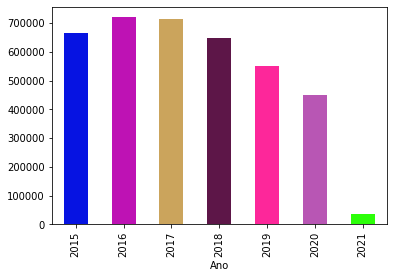

In [9]:
dfocorrencias_por_ano = dados_ocorrencias.groupby(['Ano'])['Ocorrências'].sum()
dfocorrencias_por_ano.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de ocorrências por crime

- Nesta análise da quantidade de ocorrências por crime, podemos ter uma idéia do número de ocorrências por crime, ajudando assim a descobrir quais tipos de crimes que possuem a maior quantidade de ocorrências, podendo assim ajudar em possiveis futuras classificações. Nesse caso, os crimes que possuem maior quantidade de ocorrências registradas são os de "Furto de veículo" e "Roubo de veículo", possuindo uma quantidade de ocorrências bem discrepante em relação aos outros crimes.

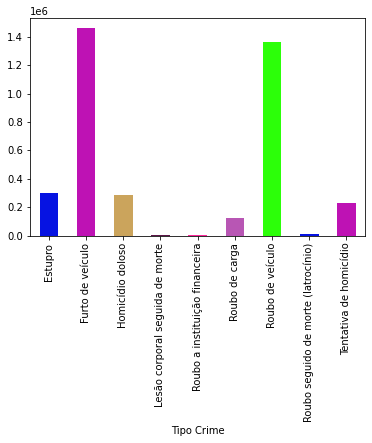

In [10]:
dfocorrencias_por_crime = dados_ocorrencias.groupby(['Tipo Crime'])['Ocorrências'].sum()
dfocorrencias_por_crime.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de ocorrências por UF

- Nesta análise da quantidade de ocorrências por UF, podemos ter uma idéia do número de ocorrências por estado, ajudando assim a descobrir quais estados que possuem a maior quantidade de ocorrências, podendo assim ajudar em possiveis futuras classificações. Nesse caso, percebemos uma quantidade de ocorrências discrepantes de ocorrências quando comparamos o estado de "São Paulo" com os outro estados. Logo em segundo estado com maior número de ocorrências, temos o "Rio de Janeiro" e "Minas gerais".

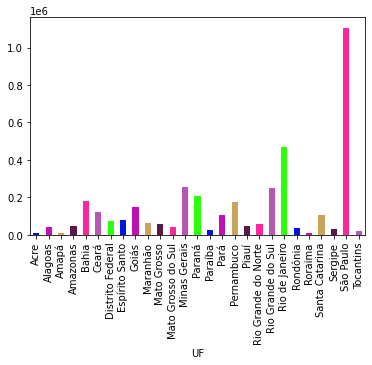

In [11]:
dfocorrencias_por_uf = dados_ocorrencias.groupby(['UF'])['Ocorrências'].sum()
dfocorrencias_por_uf.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

### Abaixo seguem algumas representações e análise dos dados para a base de vítimas:



#### Análise da quantidade de vítimas por ano

- Nesta análise da quantidade de vítimas por ano, podemos ter uma idéias da distribuição dos dados pelo tempo. Neste caso percebemos um pico no número de ocorrências no ano de 2016 e 2017, e uma menor quantidade no ano 2021. Esta difereça para o ano de 2021, assim como para o numero de ocorrências, aconteceu pois existem poucos dados registrados para o ano de 2021. Então podemos desconsiderar o ano de 2021 e considerar o menor ano com vítimas o ano de 2019.

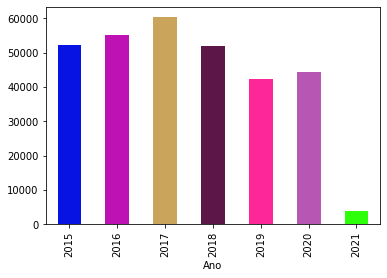

In [12]:
dfvitimas_por_ano = dados_vitimas.groupby(['Ano'])['Vítimas'].sum()
dfvitimas_por_ano.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de vítimas por crime

- Nesta análise da quantidade de vítimas por crime, diferente da análise de ocorrências, aqui a quantidade de crimes é bem menor(somente 3), neste caso sendo os crimes agrupados de maneira mais genêrica e não tão especifica. Para estes casos, temos uma quantidade de vítimas bem maior para crimes classificados como "Homicidio doloso", quando comparado com os crimes classificados como "Lesão corporal seguida de morte" ou "Roubo seguido de morte (latrocínio)".

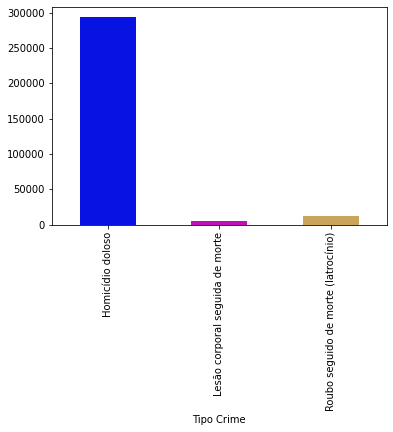

In [13]:
dfvitimas_por_crime = dados_vitimas.groupby(['Tipo Crime'])['Vítimas'].sum()
dfvitimas_por_crime.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

#### Análise da quantidade de vítimas por UF

- Nesta análise da quantidade de vítimas por UF, podemos ter uma idéia do número de vítimas por estado, ajudando assim a descobrir quais estados que possuem a maior quantidade de vítimas, podendo assim ajudar em possiveis futuras classificações. Nesse caso, percebemos a maior quantidade de vítimas para o estado da "Bahia", e o segundo maior o "Rio de Janeiro". Analisando esse resultado com a quantidade de ocorrências por estado, percebemos que apesar de o estado de "São Paulo" possuir a maior quantidade de ocorrências, o mesmo possui uma quantidade relativamente baixa de vítimas quando comparado com os outros estados, o mesmo valendo para o estado da "Bahia", que apesar de possuir um número grande de vítimas, possui uma pequena quantidade de ocorrências registradas.

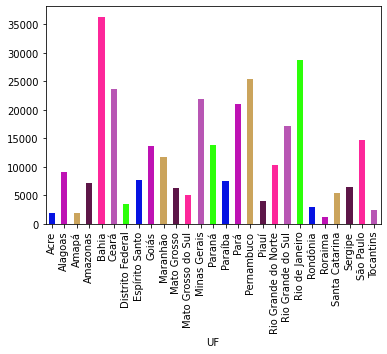

In [14]:
dfvitimas_por_uf = dados_vitimas.groupby(['UF'])['Vítimas'].sum()
dfvitimas_por_uf.plot(kind='bar', stacked='True', color=['#0613e2', '#be12b4', '#cba45c', '#5d1648', '#fd279a', '#b856b4', '#2cff09'])

## Processamento da base

##### Remoção de dados de 2021

-  Como analisado para o ano de 2021, temos poquissimos dados para o mesmo e somente para o m~es de janeiro. Esta pequena quantidade de dados podem provocar na clusterização, classificação dos dados de forma erronea devido a falta de dados. Com isso iremos remover todos os registros de 2021.

In [15]:
# Removendo dados de 2021 das bases de vitimas e ocorrências

dados_ocorrencias = dados_ocorrencias.drop(dados_ocorrencias[dados_ocorrencias.Ano == 2021].index)
dados_vitimas = dados_vitimas.drop(dados_vitimas[dados_vitimas.Ano == 2021].index)

In [16]:
dados_ocorrencias.Ano.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [17]:
dados_vitimas.Ano.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

Trasnformação das colunas de tipo de crime

- Tanto para a base de ocorrências quanto de vitimas, foram transformadas as colunas de tipo de crime, sendo que a base foi transformada para apresentar por estado, a quantidade total de ocorrência e vitimas para cada tipo de crime, não sendo mais necessário para a análise as colunas de ano, mês, quantidade total de vítimas e quantidade total de ocorrências. Abaixo segue respectivamente o codigo para transformação de ambas as bases respectivamente.

In [18]:
# Transformando base de ocorrências

groupby_ocorrencias = dados_ocorrencias.groupby(by=['UF','Tipo Crime'])['Ocorrências'].sum().reset_index()
lista_tipo_crime_ocorrencias_columns = list(dados_ocorrencias['Tipo Crime'].unique()) + ['UF']
dataset_transform_ocorrencias = pd.DataFrame(columns=lista_tipo_crime_ocorrencias_columns)
#print(groupby_ocorrencias)
count = 0
values = []

for i in range(len(groupby_ocorrencias)):
    if count == 9:
        dataset_transform_ocorrencias.loc[len(dataset_transform_ocorrencias)] = values + [groupby_ocorrencias['UF'][i-1]]
        count = 0
        values = []

    values.append(groupby_ocorrencias['Ocorrências'][i])
    count += 1

dataset_transform_ocorrencias.loc[len(dataset_transform_ocorrencias)] = values + [groupby_ocorrencias['UF'][len(groupby_ocorrencias)-1]]

dataset_transform_ocorrencias

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,UF
0,1056,2104,1794,7,12,8,4011,80,469,Acre
1,3520,6828,8488,59,98,416,17610,253,3245,Alagoas
2,2207,3808,1524,99,47,28,1868,116,1300,Amapá
3,5153,14127,6298,150,307,45,18298,371,1702,Amazonas
4,17578,32089,32888,545,130,2061,78599,974,15866,Bahia
5,9695,27749,21698,196,241,1195,53684,369,7784,Ceará
6,3874,33500,2804,34,20,292,24912,204,4851,Distrito Federal
7,3219,26146,7103,79,132,140,24394,236,14278,Espírito Santo
8,3781,60066,12585,250,294,2224,54586,479,13031,Goiás
9,7160,15974,10766,170,410,279,22966,548,6385,Maranhão


In [19]:
# Transformando base de vítimas

groupby_vitimas = dados_vitimas.groupby(by=['UF','Tipo Crime'])['Vítimas'].sum().reset_index()
lista_tipo_crime_vitimas_columns = list(dados_vitimas['Tipo Crime'].unique()) + ['UF']
dataset_transform_vitimas = pd.DataFrame(columns=lista_tipo_crime_vitimas_columns)
#print(groupby_vitimas)
values = []

for i in range(len(groupby_vitimas)):
    if i != 0 and (i % 3) == 0:
        dataset_transform_vitimas.loc[len(dataset_transform_vitimas)] = values + [groupby_vitimas['UF'][i-1]]
        values = []

    values.append(groupby_vitimas['Vítimas'][i])

dataset_transform_vitimas.loc[len(dataset_transform_vitimas)] = values + [groupby_vitimas['UF'][len(groupby_vitimas)-1]]

dataset_transform_vitimas

,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),UF
0,1740,7,58,Acre
1,8657,57,251,Alagoas
2,1595,110,104,Amapá
3,6488,155,387,Amazonas
4,34258,540,979,Bahia
5,22793,201,379,Ceará
6,3100,31,299,Distrito Federal
7,7168,82,233,Espírito Santo
8,12734,233,519,Goiás
9,10771,168,552,Maranhão


##### Normalização do atributos

-  Para normalização iremos utilizar os atributos relacionados com as quantidades de cada tipo de crime para cada um dos estados, atributos estes quantitativos e que podem apresentar uma grande variação de valores. A ideia é que após a normalização, os atributos irão conter valores que irão se situar em um intervalo entre 0 e 1.

In [20]:
# Normalização dos valores da base de ocorrências
normalize_columns_ocorrencias = dataset_transform_ocorrencias.columns[0:-1]

for column in normalize_columns_ocorrencias:
  float_array = dataset_transform_ocorrencias[column].values
  min_max_scaler = preprocessing.MinMaxScaler()
  scaled_array = min_max_scaler.fit_transform(float_array[:, np.newaxis])
  dataset_transform_ocorrencias[column] = scaled_array

dataset_transform_ocorrencias.head()

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,UF
0,0.000000,0.000000,0.022539,0.000000,0.000000,0.000118,0.005962,0.005003,0.000000,Acre
1,0.038537,0.008261,0.232970,0.048553,0.177320,0.008118,0.043793,0.113196,0.120890,Alagoas
2,0.018002,0.002980,0.014052,0.085901,0.072165,0.000510,0.000000,0.027517,0.036189,Amapá
3,0.064077,0.021026,0.164126,0.133520,0.608247,0.000843,0.045707,0.186992,0.053695,Amazonas
4,0.258403,0.052438,1.000000,0.502334,0.243299,0.040376,0.213459,0.564103,0.670513,Bahia


In [21]:
# Normalização dos valores da base de vítimas
normalize_columns_vitimas = dataset_transform_vitimas.columns[0:-1]

for column in normalize_columns_vitimas:
  float_array = dataset_transform_vitimas[column].values
  min_max_scaler = preprocessing.MinMaxScaler()
  scaled_array = min_max_scaler.fit_transform(float_array[:, np.newaxis])
  dataset_transform_vitimas[column] = scaled_array

dataset_transform_vitimas.head()

,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),UF
0,0.018946,0.000000,0.000000,Acre
1,0.227629,0.045830,0.191849,Alagoas
2,0.014572,0.094409,0.045726,Amapá
3,0.162192,0.135655,0.327038,Amazonas
4,1.000000,0.488543,0.915507,Bahia


## Verificação de similaridades atráves do gráfico HeatMap para base de ocorrências

In [22]:
from scipy.spatial.distance import pdist, squareform

In [23]:
crime_columns_ocorrencias = dataset_transform_ocorrencias.columns[0:-1]

dataframe_dist = pd.DataFrame(
    squareform(pdist(dataset_transform_ocorrencias[crime_columns_ocorrencias], metric='euclidean')),
    columns = dataset_transform_ocorrencias.UF,
    index = dataset_transform_ocorrencias.UF
)

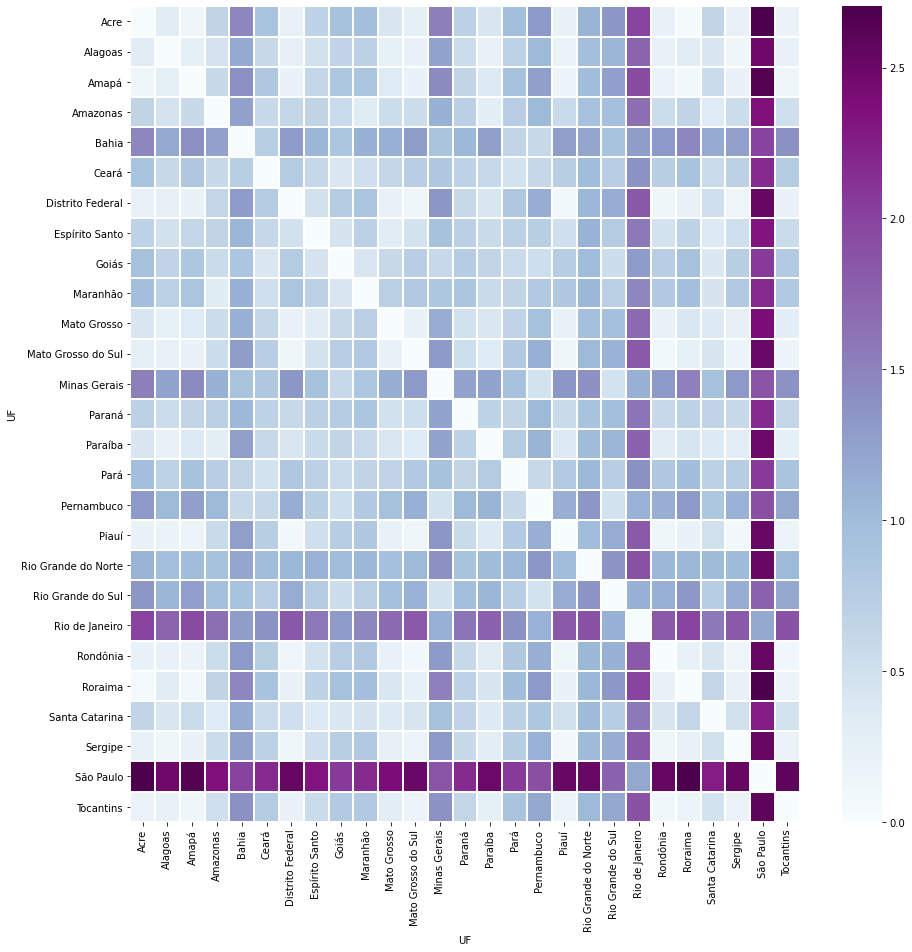

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dataframe_dist,
    cmap='BuPu',
    linewidth=1
)

- Ao analisarmos os resultados do heatmap, podemos perceber a similaridade entre a quantidade de ocorrências por diferentes crimes, em diferentes UFs.

In [25]:
long_form = dataframe_dist.unstack()

long_form.index.rename(["UF A", "UF B"], inplace=True)
long_form = long_form.to_frame('distance').reset_index()

long_form[
    (long_form['distance'] < 0.1) 
    & (long_form['UF A'] != long_form['UF B'])
]

,UF A,UF B,distance
22,Acre,Roraima,0.046230
76,Amapá,Roraima,0.094555
179,Distrito Federal,Piauí,0.090435
318,Mato Grosso do Sul,Rondônia,0.090265
465,Piauí,Distrito Federal,0.090435
578,Rondônia,Mato Grosso do Sul,0.090265
594,Roraima,Acre,0.046230
596,Roraima,Amapá,0.094555


- Como resultado da análise para os dados de ocorrências, percebemos inicialmente que o estado do Acre é o que possui menor número de ocorrências, portanto os estados pertencente ao mesmo grupo do acre, serão grupos com baixo indice de ocorrências.

- Para o estado de São Paulo, temos o maior número de ocorrências como análisado no gráfico, portanto os estados que pertencem ao grupo de são paulo serão os com maior número de ocorrências.

- Para os estados que não se encaixem em nenhum dos grupos anteriores, os mesmos serão classificados como estados de número médio de ocorrências.

## Verificação de similaridades atráves do gráfico HeatMap para base de vítimas

In [26]:
crime_columns_vitimas = dataset_transform_vitimas.columns[0:-1]

dataframe_dist = pd.DataFrame(
    squareform(pdist(dataset_transform_vitimas[crime_columns_vitimas], metric='euclidean')),
    columns = dataset_transform_vitimas.UF,
    index = dataset_transform_vitimas.UF
)

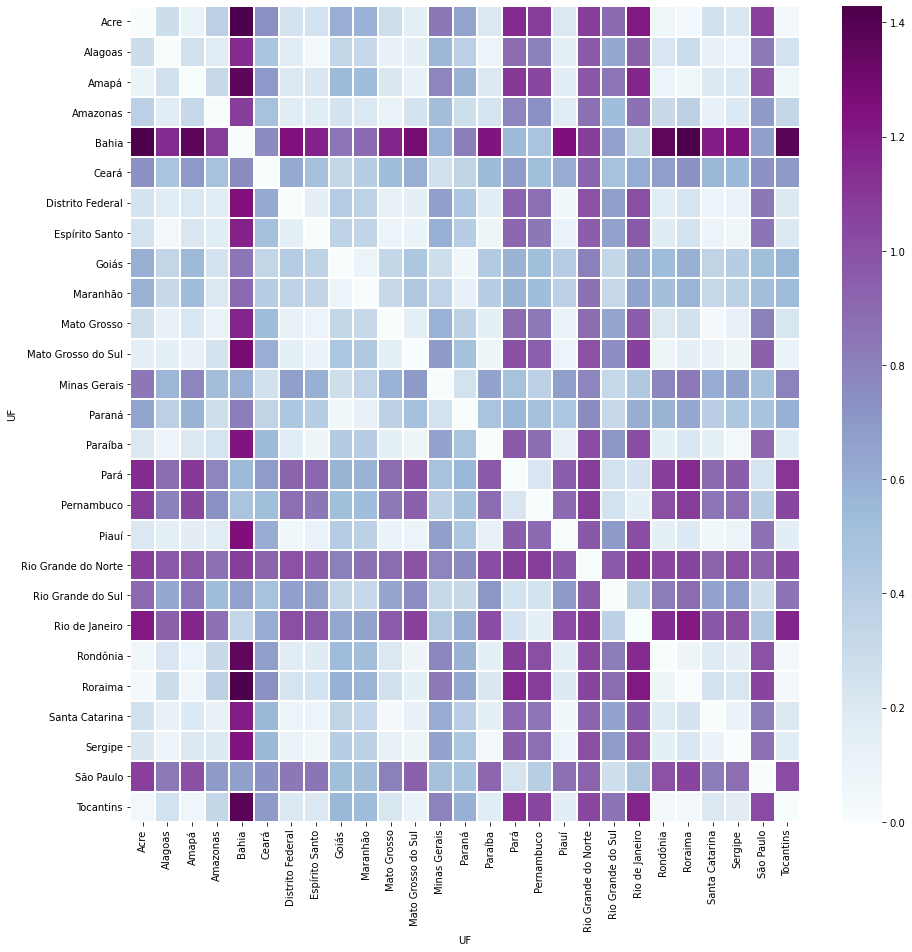

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dataframe_dist,
    cmap='BuPu',
    linewidth=1
)

- Ao analisarmos os resultados do heatmap, podemos perceber a similaridade entre a quantidade de vítimas por diferentes crimes, em diferentes UFs.

In [28]:
long_form = dataframe_dist.unstack()

long_form.index.rename(["Uf A", "Uf B"], inplace=True)
long_form = long_form.to_frame('distance').reset_index()

In [29]:
long_form[
    (long_form['distance'] < 0.1) 
    & (long_form['Uf A'] != long_form['Uf B'])
]

,Uf A,Uf B,distance
21,Acre,Rondônia,0.072328
22,Acre,Roraima,0.039876
26,Acre,Tocantins,0.052646
34,Alagoas,Espírito Santo,0.053509
41,Alagoas,Paraíba,0.086738
51,Alagoas,Sergipe,0.087596
75,Amapá,Rondônia,0.092027
76,Amapá,Roraima,0.071596
80,Amapá,Tocantins,0.065782
179,Distrito Federal,Piauí,0.057230


- Como resultado da análise para os dados de vítimas, percebemos inicialmente que o estado do Acre é o que possui menor número de vítimas, portanto os estados pertencente ao mesmo grupo do Acre, serão grupos com baixo indice de vítimas. É possivel perceber isso atráves dos valores de vitimas do acre quando comparado com os outros estados.

- Para o estado da Bahia, temos o maior número de vítimas como análisado no gráfico, portanto os estados que pertencem ao grupo da Bahia, serão os com maior número de vítimas.

- Para os estados que não se encaixem em nenhum dos grupos anteriores, os mesmos serão classificados como estados de número médio de vítimas.

## Algoritmos de Clusterização para base de ocorrências(Cluster Hierárquico)

In [30]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

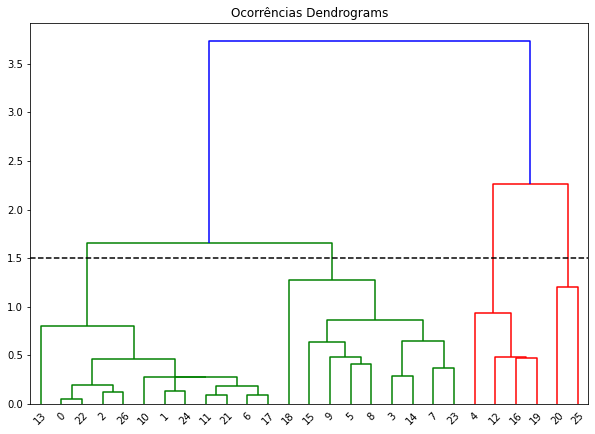

In [31]:
number_trasnformed_ocorrencias = dataset_transform_ocorrencias.loc[:, dataset_transform_ocorrencias.columns != 'UF']

plt.figure(figsize=(10, 7))
plt.title("Ocorrências Dendrograms")
dend = shc.dendrogram(shc.linkage(number_trasnformed_ocorrencias, method='ward'))

plt.axhline(y=1.5, c='k', ls='--')

- Análisando o denograma obtido para os dados de ocorrência, percebemos que podemos realizar a divisão dos dados em três clusters, podendo classificar os estados em três: baixo numero de ocorrências, médio numero de ocorrências e alto número de ocorrências. Podemos perceber essa divisão ao traçar uma linha no eixo y na posição 1.5. Desta maneira conseguimos perceber de forma mais clara a divisão dos clusters, sendo que o ultimo somente foi dividido em um unico cluster, pois os dados do mesmos estão ligeiramente proximos.

In [32]:
# Realizando classificação aglomerativa

agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
agg_cluster.fit(number_trasnformed_ocorrencias)

clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'Estados': list(dataset_transform_ocorrencias.UF), 'Index': dataset_transform_ocorrencias.index, 'cluster': clusters_h}
dataframe_clusters_h = pd.DataFrame(clusters_dict_h, columns = ['cluster','Estados', 'Index'])

dataframe_clusters_h

,cluster,Estados,Index
0,0,Acre,0
1,0,Alagoas,1
2,0,Amapá,2
3,0,Amazonas,3
4,2,Bahia,4
5,0,Ceará,5
6,0,Distrito Federal,6
7,0,Espírito Santo,7
8,0,Goiás,8
9,0,Maranhão,9


- Analisando o resultado obtido pelo algoritimo de classificação aglomerativa, temos como resultado os seguintes grupos:

1. O grupo zero contém o estado Acre, que como analisado anteriormente, é o estado com menor número de ocorrências, portanto este grupo será o grupo com os estados de menor número de ocorrências.

2. O grupo um contém o estado São Paulo,  que como analisado anteriormente, é o estado com maior número de ocorrências, portanto este grupo será o grupo com os estados de maior número de ocorrências.

3. O grupo restante é o dois, portanto como analisado anteriormente, todos os estados classificados nesse grupo serão estados com médio numero de ocorrências.

In [33]:
# Convertendo para excel

dataframe_clusters_h.to_excel("cluster_ocorrencias.xlsx")  

## Algoritmos de Clusterização para base de vítimas(Cluster Hierárquico)

- Análisando o denograma obtido para os dados de vítimas, percebemos que podemos realizar a divisão dos dados em três clusters, podendo classificar os estados em três: baixo numero de vítimas, médio numero de vítimas e alto número de vítimas. Podemos perceber essa divisão ao traçar uma linha no eixo y na posição 1.2. Desta maneira conseguimos perceber de forma mais clara a divisão dos clusters, sendo que para este caso, percebemos uma maior quantidade de valores classificados como médio e alto, apresentando assim possivelmente um resultado com uma maior quantidade de estados com média e alta quantidade de vítimas.

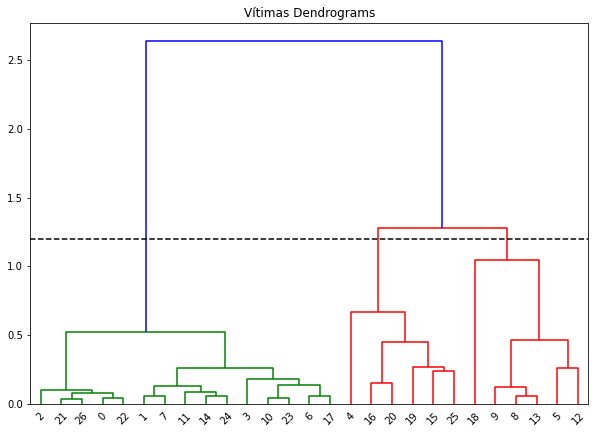

In [34]:
number_trasnformed_vitimas = dataset_transform_vitimas.loc[:, dataset_transform_vitimas.columns != 'UF']

plt.figure(figsize=(10, 7))
plt.title("Vítimas Dendrograms")
dend = shc.dendrogram(shc.linkage(number_trasnformed_vitimas, method='ward'))

plt.axhline(y=1.2, c='k', ls='--')

In [35]:
# Realizando classificação aglomerativa

agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
agg_cluster.fit(number_trasnformed_vitimas)

clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'Estados': list(dataset_transform_vitimas.UF), 'Index': dataset_transform_vitimas.index, 'cluster': clusters_h}
dataframe_clusters_h = pd.DataFrame(clusters_dict_h, columns = ['cluster','Estados', 'Index'])

dataframe_clusters_h

,cluster,Estados,Index
0,1,Acre,0
1,1,Alagoas,1
2,1,Amapá,2
3,1,Amazonas,3
4,2,Bahia,4
5,0,Ceará,5
6,1,Distrito Federal,6
7,1,Espírito Santo,7
8,0,Goiás,8
9,0,Maranhão,9


- Analisando o resultado obtido pelo algoritimo de classificação aglomerativa, temos como resultado os seguintes grupos:

1. O grupo um contém o estado Acre, que como analisado anteriormente, é o estado com menor número de vítimas, portanto este grupo será o grupo com os estados de menor número de vítimas.

2. O grupo dois contém o estado da Bahia, que como analisado anteriormente, é o estado com maior número de vítimas, portanto este grupo será o grupo com os estados de maior número de vítimas.

3. O grupo restante é o zero, portanto como analisado anteriormente, todos os estados classificados nesse grupo serão estados com médio numero de vítimas.

In [36]:
# Convertendo para excel

dataframe_clusters_h.to_excel("cluster_vitimas.xlsx")  

## Visualização dos Dados

- A visualização dos dados foi feita atráves do PowerBi

- Segue respectivamente as representações dos estados com os valores para ocorrência e vítimas 

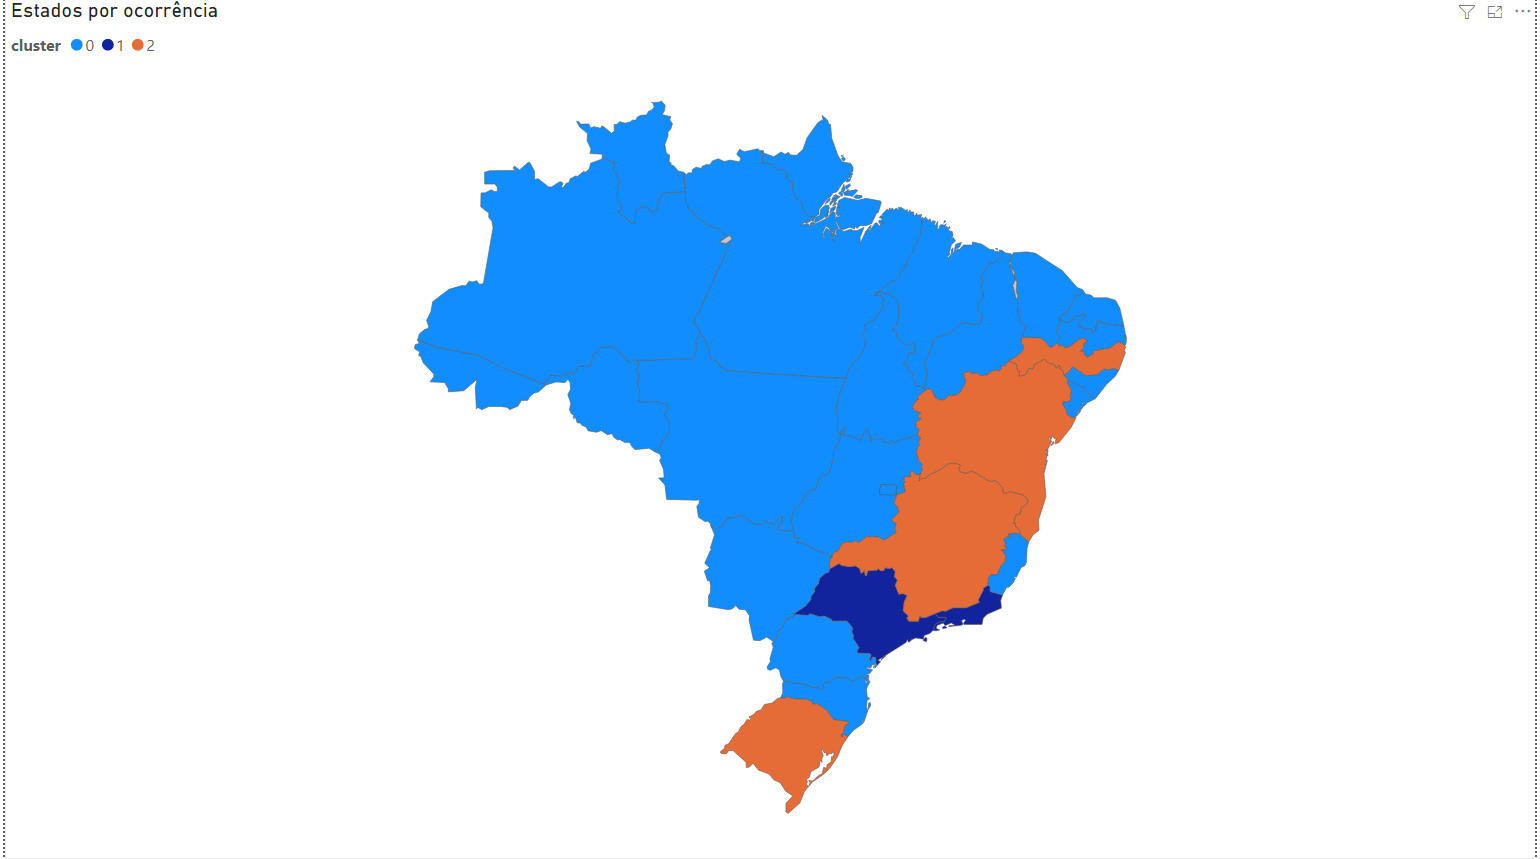

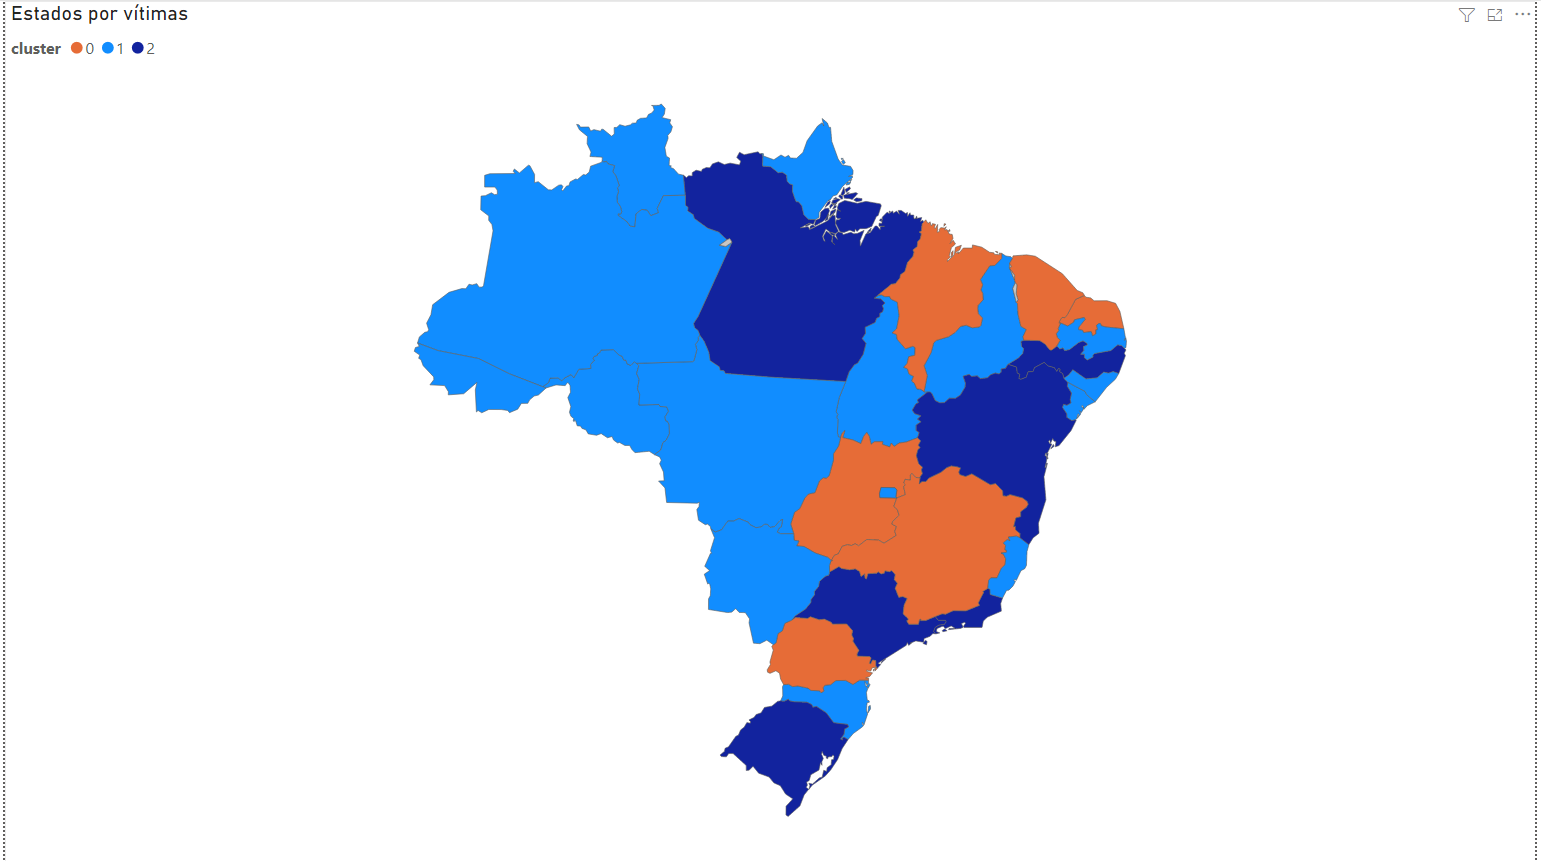